In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
from buildTest import getRegData, getClassiData
Xr_train,Xr_val,yr_train,yr_val = getRegData()
Xc_train,Xc_val,yc_train,yc_val = getClassiData()

In [3]:
os.chdir('../..')

In [4]:
from MLfromScratch.linear_model import SGDRegressor
from MLfromScratch.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
sgdr = SGDRegressor(seed=5,normalize=True)
sgdr.fit(Xr_train,yr_train,lr=0.1,tol=0.01,verbose=False)
sgdr.score(Xr_val,yr_val)

0.631340303810298

0.631340303810298
5.127396267753741


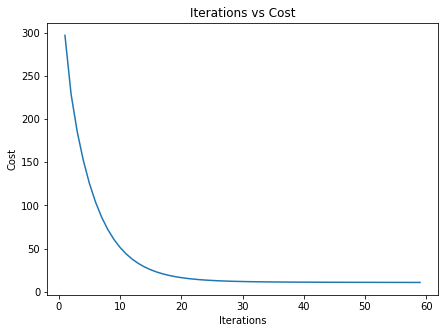

In [5]:
print(r2_score( yr_val, sgdr.predict(Xr_val) ))
print(root_mean_squared_error(yr_val, sgdr.predict(Xr_val)))
sgdr.plot()

In [6]:
from MLfromScratch.linear_model import SGDClassifier
sgdc = SGDClassifier(seed=5,normalize=True)
sgdc.fit(Xc_train,yc_train,lr=0.1,tol=1e-5,verbose=False)
sgdc.score(Xc_val,yc_val)

0.9746543778801844

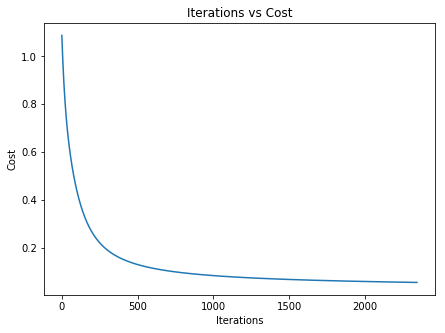

In [7]:
sgdc.plot()

In [8]:
from MLfromScratch.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_true = yc_val
y_pred = sgdc.predict(Xc_val)
y_score = sgdc.predict_proba(Xc_val)[:,1]
print(accuracy_score(y_true,y_pred))
confusion_matrix(y_true,y_pred)

0.9746543778801844


array([[226,   8],
       [  3, 197]])

0.9991239316239316

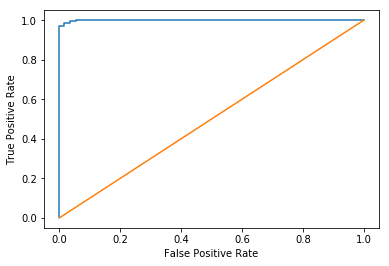

In [9]:
roc_curve(y_true,y_score,plot=True)
roc_auc_score(y_true,y_score)

In [10]:
from MLfromScratch.metrics import precision_score, recall_score, sensitivity_score, specificity_score, f1_score
precision_score(y_true,y_pred,), recall_score(y_true,y_pred), sensitivity_score(y_true,y_pred), specificity_score(y_true,y_pred), f1_score(y_true,y_pred)

(0.9609756097560975, 0.985, 0.985, 0.9658119658119658, 0.9728395061728395)